In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
import nltk
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn import pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import MultinomialNB

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/Aim-Tech/cleaned.csv")

In [ ]:
data.head()

,id,text,dialect
0,1175358310087892992,لكن بالنهاية ينتفض يغير,IQ
1,1175416117793349632,يعني هذا محسوب على البشر حيونه ووحشيه وتطلب...,IQ
2,1175450108898565888,مبين من كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين هل الغيبه اخ محمد,IQ


In [ ]:
X = data.text.values
y = data.dialect.values
X_train,X_test,y_train,y_test= train_test_split(X,y,shuffle=True,random_state=42,
                                                stratify=y,test_size=.01)

In [ ]:
X_train.shape ,X_test.shape

((453615,), (4582,))

In [ ]:
# pipe = Pipeline([("tf",tfidf()),("NB",MultinomialNB())])
# pipe.fit(X_train,y_train)


from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
pipe = Pipeline([
    
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('oversmpling',SMOTE()),
    ('clf', MultinomialNB()),
 ])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('oversmpling', SMOTE()), ('clf', MultinomialNB())])

In [ ]:
preds = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score,classification_report
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

          AE       0.44      0.42      0.43       275
          BH       0.31      0.49      0.38       169
          DZ       0.44      0.56      0.50       128
          EG       0.88      0.72      0.79       705
          IQ       0.59      0.68      0.63       135
          JO       0.24      0.49      0.33       138
          KW       0.55      0.55      0.55       417
          LB       0.80      0.59      0.68       375
          LY       0.64      0.80      0.71       294
          MA       0.72      0.51      0.60       162
          OM       0.38      0.47      0.42       155
          PL       0.59      0.51      0.55       503
          QA       0.57      0.43      0.49       408
          SA       0.50      0.35      0.41       377
          SD       0.56      0.79      0.65       101
          SY       0.26      0.56      0.35        75
          TN       0.60      0.49      0.54       114
          YE       0.19    

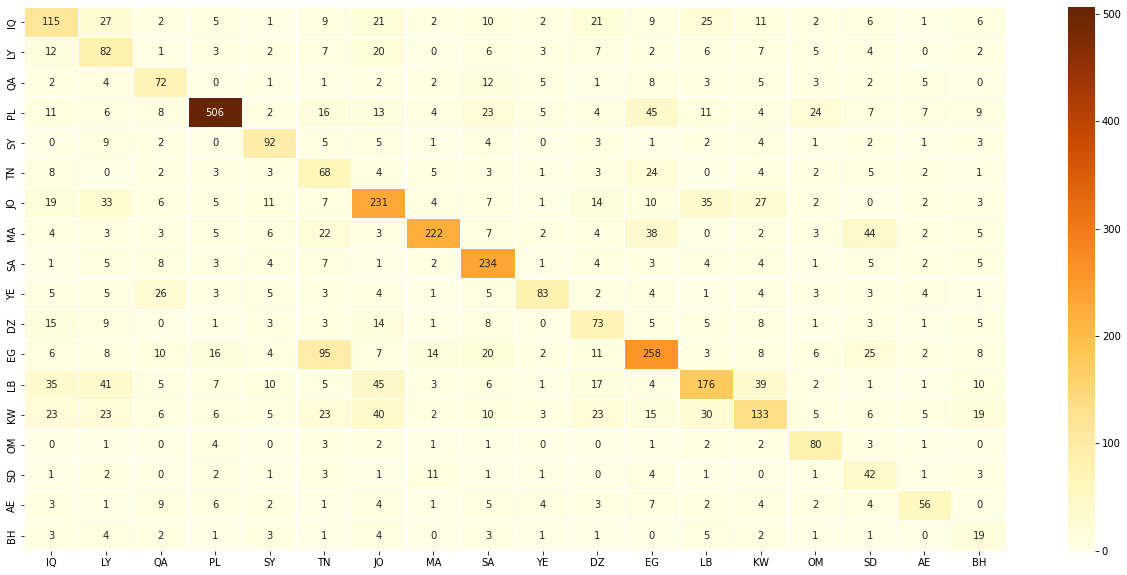

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,classification_report

print(classification_report(preds,y_test))
plt.figure(figsize=(22,10))
conf = confusion_matrix(preds,y_test)
ax = seaborn.heatmap(conf,annot=True, linewidths=.3,cmap='YlOrBr',fmt='d')

ax.set_xticklabels(data.dialect.unique())
ax.set_yticklabels(data.dialect.unique())
plt.show() 

In [ ]:
from sklearn.utils import class_weight
import numpy  as np
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(data.dialect),
                                                 y = data.dialect)
class_weights = {i : class_weights[i] for i in range(18)}

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
pipe = Pipeline([
    
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('oversmpling',SMOTE()),
    ('clf', KNN(n_neighbors=100)),
 ])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('oversmpling', SMOTE()),
                ('clf', KNeighborsClassifier(n_neighbors=100))])

In [ ]:
preds = pipe.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          AE       0.29      0.29      0.29       262
          BH       0.24      0.25      0.25       251
          DZ       0.64      0.18      0.28       580
          EG       0.00      0.00      0.00         0
          IQ       0.67      0.23      0.34       448
          JO       0.23      0.26      0.25       249
          KW       0.01      0.67      0.03         9
          LB       0.12      0.69      0.20        48
          LY       0.25      0.78      0.38       115
          MA       0.42      0.62      0.50        78
          OM       0.34      0.24      0.28       271
          PL       0.02      0.50      0.04        18
          QA       0.20      0.46      0.28       135
          SA       0.03      0.40      0.06        20
          SD       0.70      0.15      0.25       675
          SY       0.58      0.15      0.24       608
          TN       0.37      0.53      0.43        64
          YE       0.53    

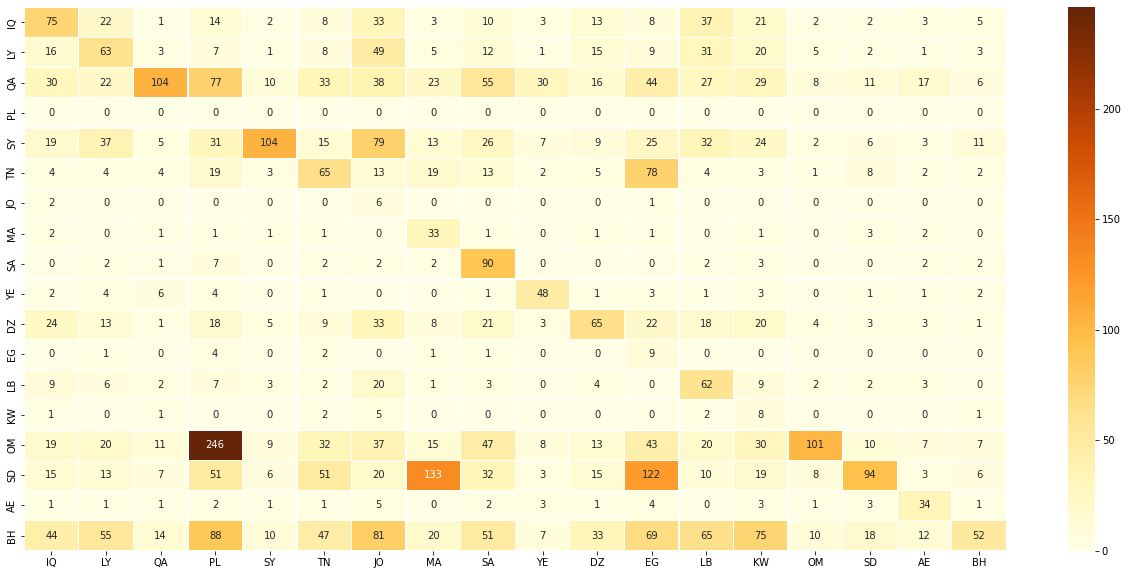

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,classification_report

print(classification_report(preds,y_test))
plt.figure(figsize=(22,10))
conf = confusion_matrix(preds,y_test)
ax = seaborn.heatmap(conf,annot=True, linewidths=.3,cmap='YlOrBr',fmt='d')

ax.set_xticklabels(data.dialect.unique())
ax.set_yticklabels(data.dialect.unique())
plt.show() 